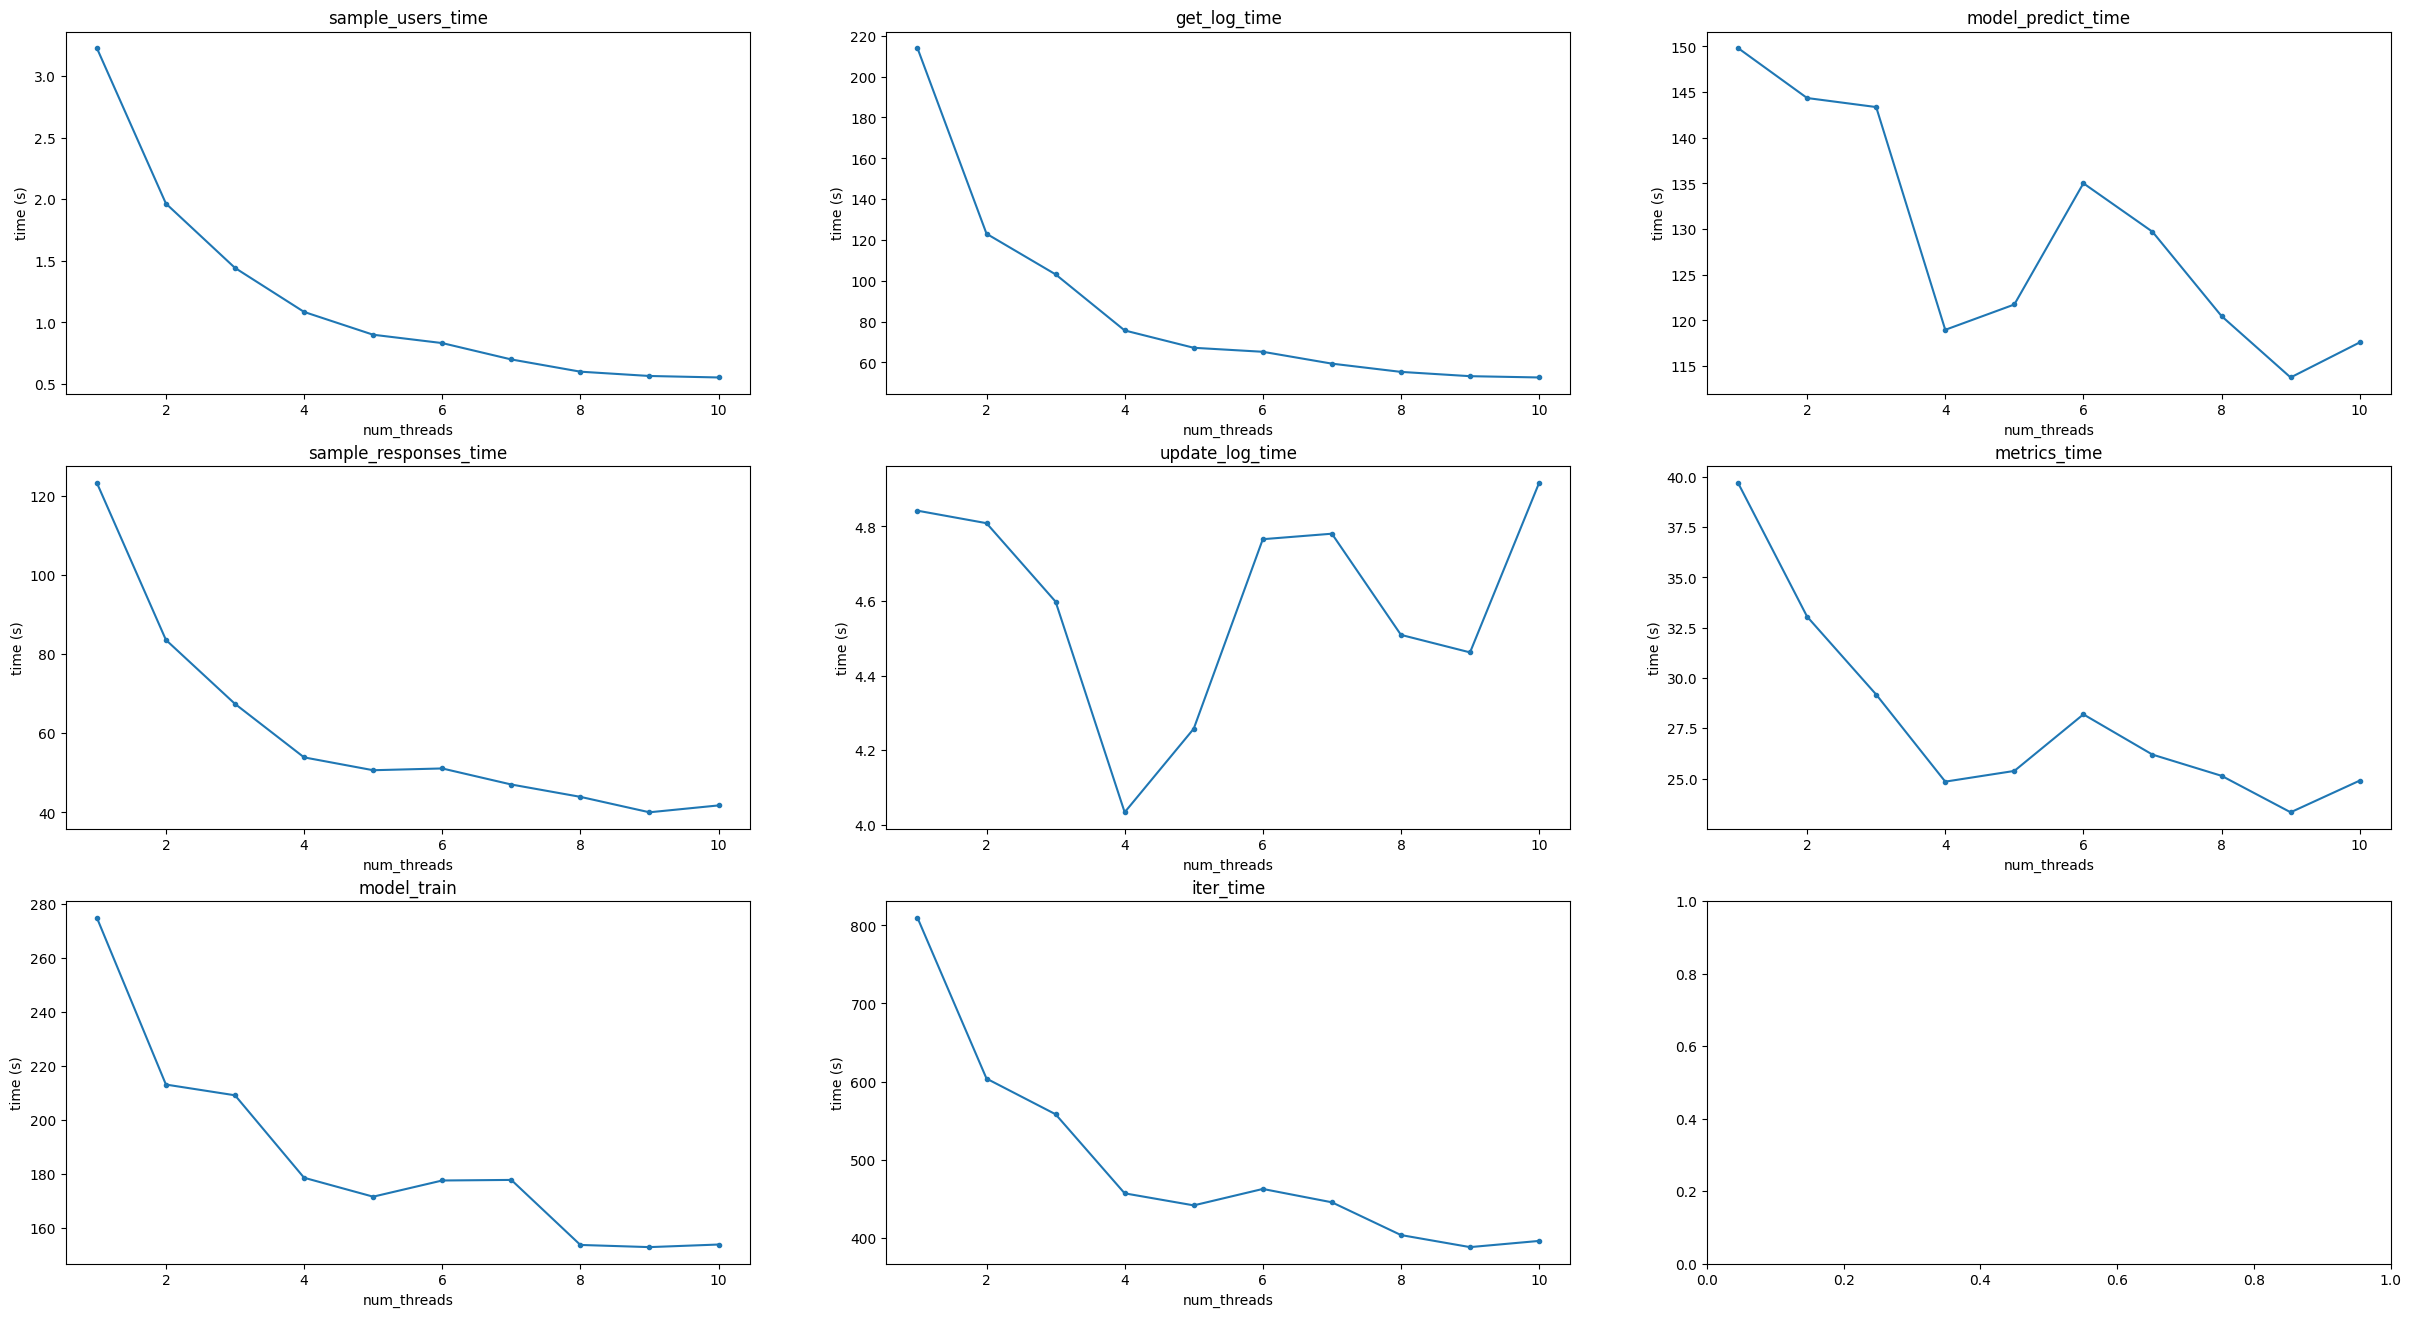

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

RESULT_DIR = '../bin'

result_df = pd.read_csv(f'{RESULT_DIR}/cycle_time.csv')

columns = [
    'sample_users_time', 'get_log_time', 'model_predict_time',
    'sample_responses_time', 'update_log_time', 'metrics_time',
    'model_train', 'iter_time'
]

fig, ax = plt.subplots(3, 3, figsize=(30, 16))
for i, c in enumerate(columns):
    row = i // 3
    col = i % 3

    gr = result_df.groupby(['num_threads']) 
    y = gr.mean()[c].values
    x = gr.mean()[c].index.values

    ax[row, col].plot(x, y, marker='.')
    ax[row, col].set_title(c)
    ax[row, col].set_xlabel('num_threads')
    ax[row, col].set_ylabel('time (s)')

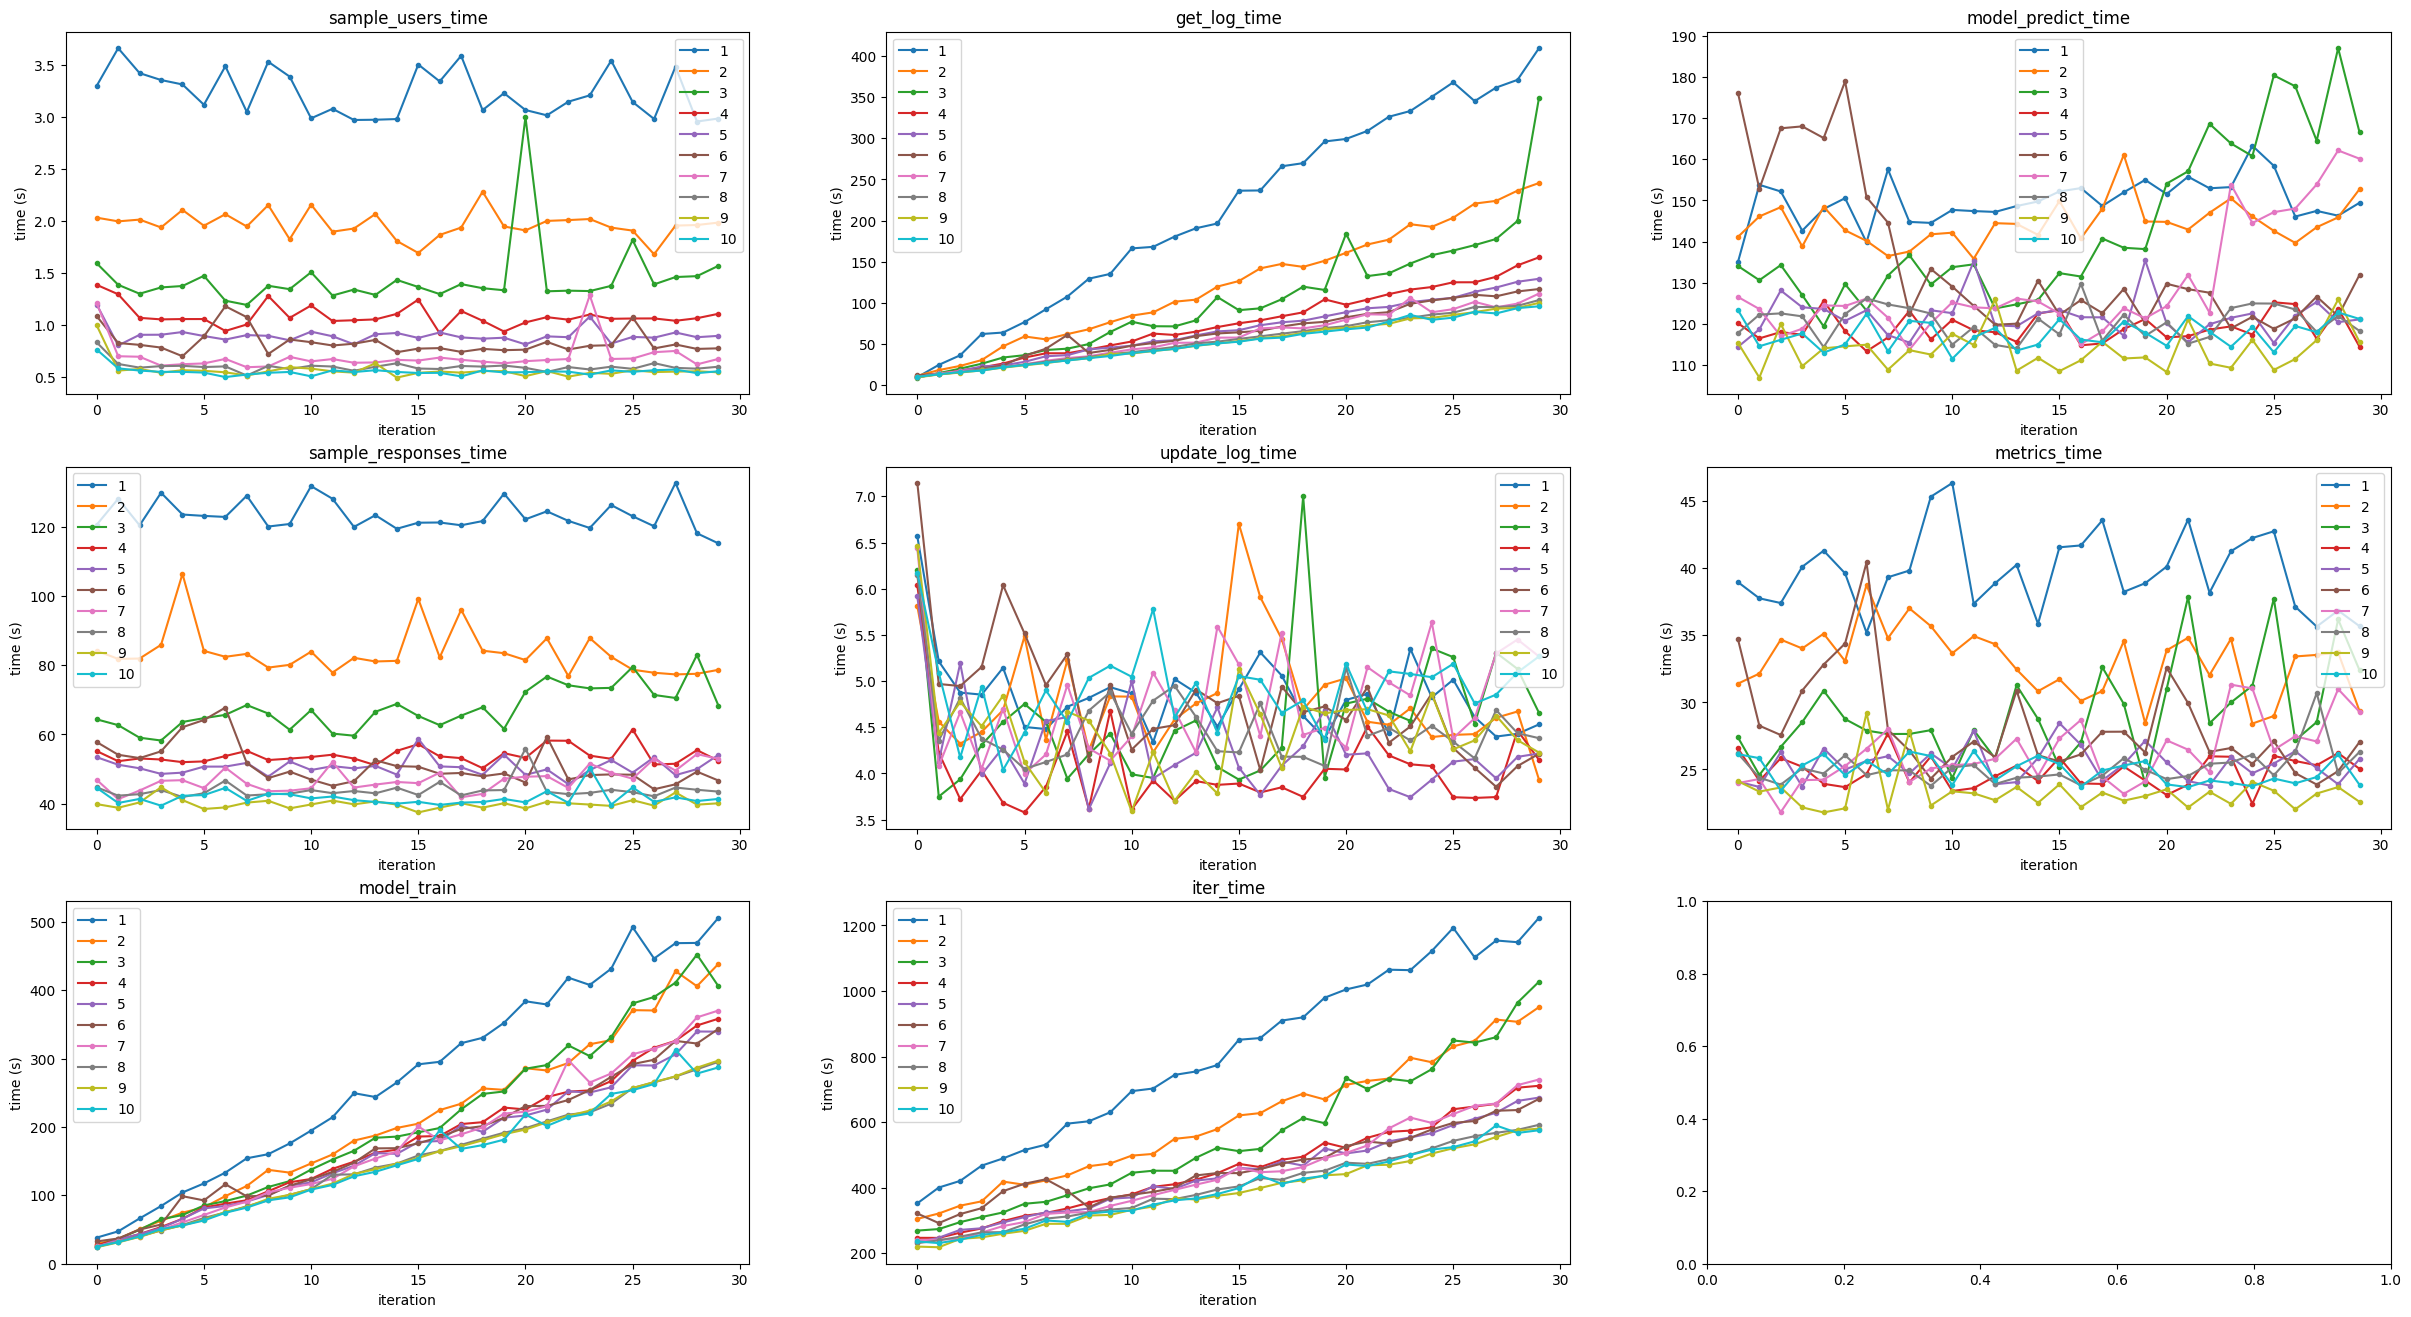

In [2]:
fig, ax = plt.subplots(3, 3, figsize=(30, 16))
for i, c in enumerate(columns):
    row = i // 3
    col = i % 3

    for n in result_df.num_threads.unique():
        sub_df = result_df[result_df.num_threads == n]
        ax[row, col].plot(sub_df.iteration, sub_df[c], marker='.', label=str(n))
        ax[row, col].set_title(c)
        ax[row, col].set_xlabel('iteration')
        ax[row, col].set_ylabel('time (s)')
        ax[row, col].legend()